In [52]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date)==6).all()

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [5]:
#  3. Convert the June temperatures to a list.
June_temps = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date)==6).all()

In [13]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(June_temps, columns = ['date', 'June Temps'])
df.set_index(df['date'], inplace=True)
df=df[['June Temps']]
df

,June Temps
date,
2010-06-01,78.0
2010-06-02,76.0
2010-06-03,78.0
2010-06-04,76.0
2010-06-05,77.0
...,...
2017-06-26,79.0
2017-06-27,74.0
2017-06-28,74.0


In [14]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date)==12).all()

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [9]:
# 7. Convert the December temperatures to a list.
Dec_temps = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date)==12).all()

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df = pd.DataFrame(Dec_temps, columns = ['date', 'December Temps'])
df.set_index(df['date'], inplace=True)
df=df[['December Temps']]
df

,December Temps
date,
2010-12-01,76.0
2010-12-03,74.0
2010-12-04,74.0
2010-12-06,64.0
2010-12-07,64.0
...,...
2016-12-27,71.0
2016-12-28,71.0
2016-12-29,69.0


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [15]:
session.query(Measurement.date, Measurement.tobs).\
filter(extract("year", Measurement.date)==2011).all()

[('2011-01-01', 69.0),
 ('2011-01-02', 72.0),
 ('2011-01-03', 74.0),
 ('2011-01-04', 73.0),
 ('2011-01-05', 64.0),
 ('2011-01-06', 65.0),
 ('2011-01-07', 68.0),
 ('2011-01-08', 62.0),
 ('2011-01-09', 58.0),
 ('2011-01-10', 73.0),
 ('2011-01-11', 60.0),
 ('2011-01-13', 68.0),
 ('2011-01-14', 76.0),
 ('2011-01-15', 68.0),
 ('2011-01-16', 66.0),
 ('2011-01-17', 64.0),
 ('2011-01-18', 64.0),
 ('2011-01-19', 64.0),
 ('2011-01-20', 76.0),
 ('2011-01-21', 75.0),
 ('2011-01-22', 68.0),
 ('2011-01-23', 68.0),
 ('2011-01-24', 72.0),
 ('2011-01-25', 63.0),
 ('2011-01-27', 68.0),
 ('2011-01-28', 75.0),
 ('2011-01-29', 65.0),
 ('2011-01-30', 64.0),
 ('2011-01-31', 68.0),
 ('2011-02-01', 68.0),
 ('2011-02-02', 66.0),
 ('2011-02-03', 67.0),
 ('2011-02-04', 64.0),
 ('2011-02-05', 65.0),
 ('2011-02-06', 75.0),
 ('2011-02-07', 68.0),
 ('2011-02-08', 71.0),
 ('2011-02-09', 71.0),
 ('2011-02-10', 71.0),
 ('2011-02-12', 68.0),
 ('2011-02-13', 68.0),
 ('2011-02-14', 72.0),
 ('2011-02-15', 70.0),
 ('2011-02-

## D3: Extra Information (Precipitation)

In [25]:
June_prcp = session.query(Measurement.date, Measurement.prcp).\
filter(extract('month', Measurement.date)==6).all()

df = pd.DataFrame(June_prcp, columns = ['date', 'June Prcp'])
df.set_index(df['date'], inplace=True)
df_june=df[['June Prcp']]
df_june.describe()

,June Prcp
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [26]:
Dec_prcp = session.query(Measurement.date, Measurement.prcp).\
filter(extract('month', Measurement.date)==12).all()

df = pd.DataFrame(Dec_prcp, columns = ['date', 'Dec Prcp'])
df.set_index(df['date'], inplace=True)
df_dec=df[['Dec Prcp']]
df_dec.describe()

,Dec Prcp
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [ ]:
# Histogtam comparing tobs per station ??

In [43]:
Dec_hist = pd.DataFrame(session.query(Measurement.station, Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date)==12).all(), columns = ['Station','Date','Prcp'])

June_hist = pd.DataFrame(session.query(Measurement.station, Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date)==6).all(), columns = ['Station','Date','Prcp'])

In [47]:
plots = pd.merge(June_hist, Dec_hist, on = "Station")
plots_grouped = plots.groupby("Station")

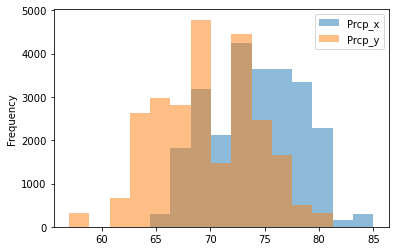

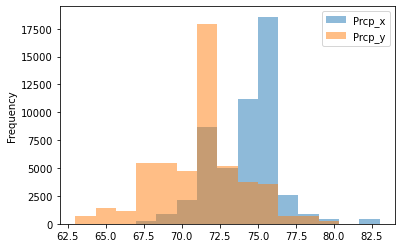

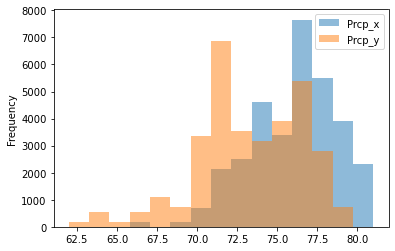

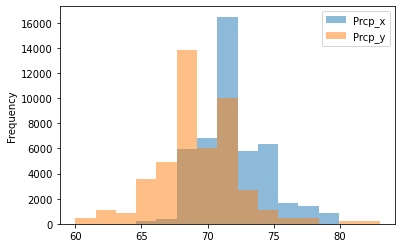

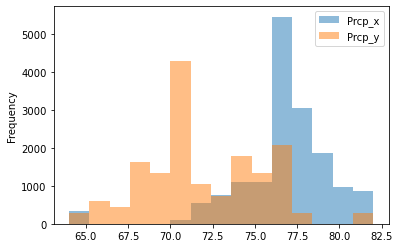

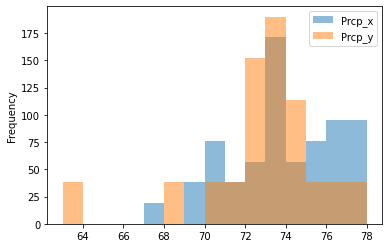

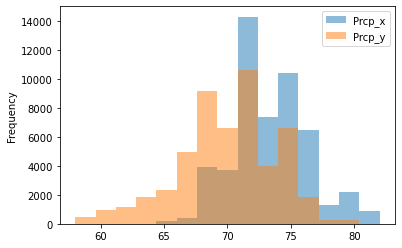

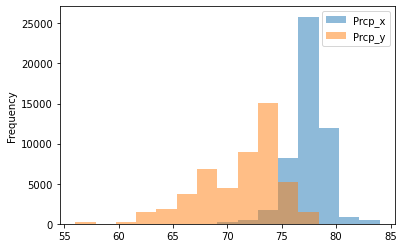

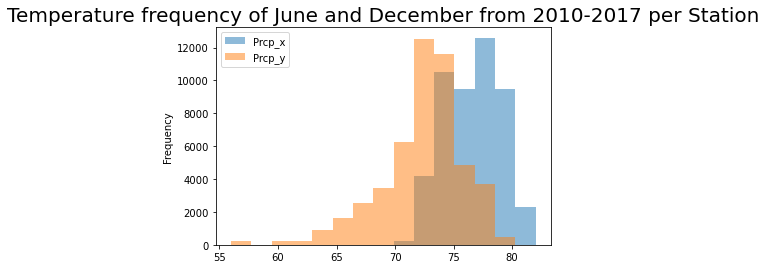

In [55]:
plots_grouped.plot.hist(bins=15, alpha=0.5)
plt.title("Temperature frequency of June and December from 2010-2017 per Station", fontsize=20)
plt.show()